In [7]:
import cv2
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
filename1 = './data/suspector/suspector1.jpg'
filename2 = './data/suspector/suspector2.jpg'
filename3 = './data/suspector/suspector3.jpg'
filename4 = './data/suspector/suspector4.jpg'
filename5 = './data/suspector/suspector5.jpg'
filename_criminal = './data/find_criminal.jpg'

src1_bgr = []
src2_bgr = cv2.imread(filename_criminal)
img1 = []
img2= cv2.cvtColor(src2_bgr,cv2.COLOR_BGR2GRAY)
src1_rgb = []
src2_rgb = cv2.cvtColor(src2_bgr,cv2.COLOR_BGR2RGB)

src1_bgr.append(cv2.imread(filename1))
src1_bgr.append(cv2.imread(filename2))
src1_bgr.append(cv2.imread(filename3))
src1_bgr.append(cv2.imread(filename4))
src1_bgr.append(cv2.imread(filename5))

img1.append(cv2.cvtColor(src1_bgr[0],cv2.COLOR_BGR2GRAY))
img1.append(cv2.cvtColor(src1_bgr[1],cv2.COLOR_BGR2GRAY))
img1.append(cv2.cvtColor(src1_bgr[2],cv2.COLOR_BGR2GRAY))
img1.append(cv2.cvtColor(src1_bgr[3],cv2.COLOR_BGR2GRAY))
img1.append(cv2.cvtColor(src1_bgr[4],cv2.COLOR_BGR2GRAY))

src1_rgb.append(cv2.cvtColor(src1_bgr[0],cv2.COLOR_BGR2RGB))
src1_rgb.append(cv2.cvtColor(src1_bgr[1],cv2.COLOR_BGR2RGB))
src1_rgb.append(cv2.cvtColor(src1_bgr[2],cv2.COLOR_BGR2RGB))
src1_rgb.append(cv2.cvtColor(src1_bgr[3],cv2.COLOR_BGR2RGB))
src1_rgb.append(cv2.cvtColor(src1_bgr[4],cv2.COLOR_BGR2RGB))

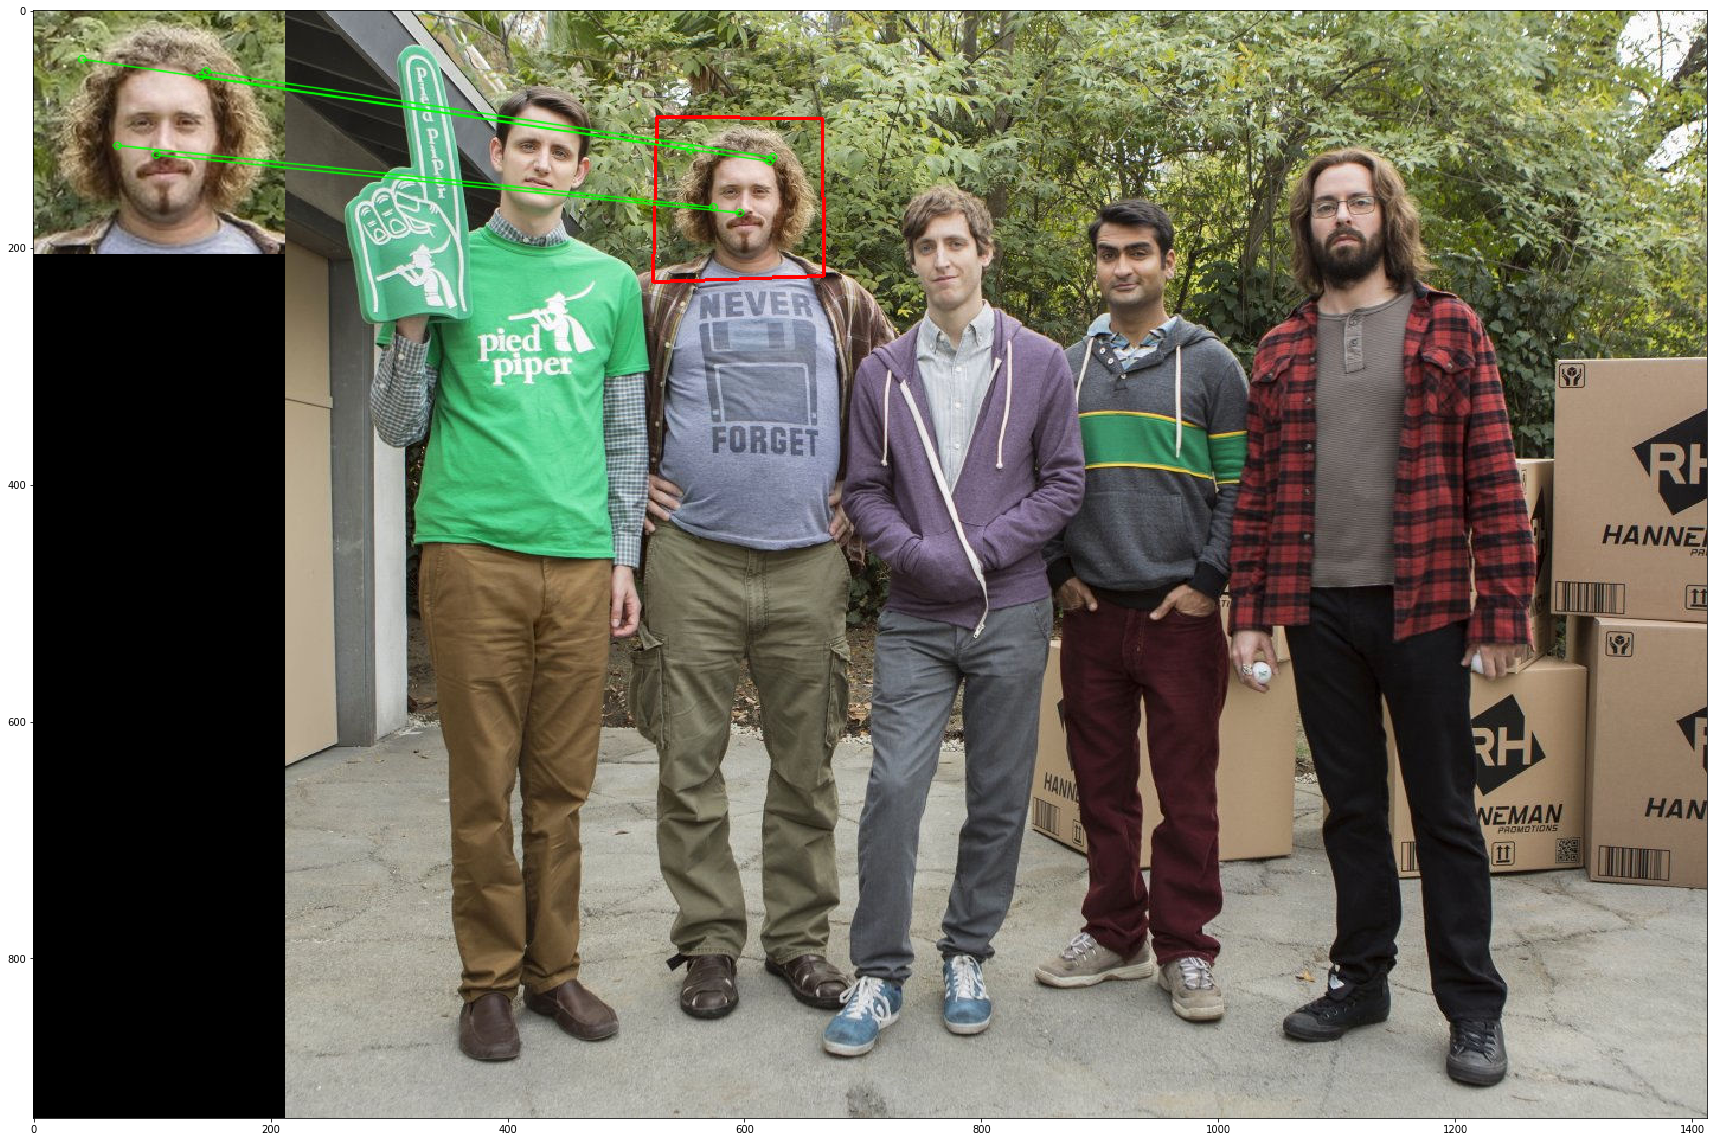

In [11]:
# TODO: 코드구현

minGood_matches = list()
minMatchesLen = 200
minIndex = 0

for index in range(0,5):

    orb = cv2.ORB_create(nfeatures = 1000)
    brisk = cv2.BRISK_create()
    detector = [orb, brisk] #배열 안에 두개의 객체를 넣음

    didx = 1
    #detect로 KeyPonit로 찾고 Compute로 descriptor 정보가 나온다
    kp1, des1 = detector[didx].detectAndCompute(img1[index], None) #여기수정
    kp2, des2 = detector[didx].detectAndCompute(img2, None)

    bf = cv2.BFMatcher_create(cv2.NORM_HAMMING, crossCheck = True)
    flann = cv2.FlannBasedMatcher_create()
    matcher = [bf, flann]

    midx = 0

    try:
        matches = matcher[midx].match(des1, des2)
    except:
        matches = matcher[midx].match(np.float32(des1), np.float32(des2))

    matches = sorted(matches, key = lambda x:x.distance)
    minDist = matches[0].distance

    good_matches = list(filter(lambda m : m.distance <= minDist * 2, matches))

    if len(good_matches) < 5:
        print("sorry, too small good matches")
        exist()
    
    if minMatchesLen > len(good_matches):
        minMatchesLen = len(good_matches)
        minGood_matches = good_matches
        minIndex = index

kp1, des1 = detector[didx].detectAndCompute(img1[minIndex], None) #여기수정
kp2, des2 = detector[didx].detectAndCompute(img2, None)

src1_pts = np.float32([kp1[m.queryIdx].pt for m in minGood_matches])
src2_pts = np.float32([kp2[m.trainIdx].pt for m in minGood_matches])

H, mask = cv2.findHomography(src1_pts, src2_pts, cv2.RANSAC, 3.0)
mask_matches = mask.flatten().tolist()

h,w = img1[minIndex].shape #여기 수정
pts= np.float32([[0,0],[0,h-1],[w-1,h-1],[w-1,0]]).reshape(-1,1,2)
pts2 = cv2.perspectiveTransform(pts,H)

src2_rgb = cv2.polylines(src2_rgb, [np.int32(pts2)], True, (255,0,0),2)
draw_params = dict(matchColor=(0,255,0), singlePointColor= None, matchesMask = mask_matches, flags=2)
img5 = cv2.drawMatches(src1_rgb[minIndex], kp1, src2_rgb, kp2,minGood_matches, None, **draw_params)
#여기 수정

plt.figure(figsize=(30,60))
plt.imshow(img5)
plt.show()